## Import libraries

In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
b = np.random.randint(2, size = np.random.randint(40, 50))
print(b)

[1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0]


In [45]:
Tb = 0.001      
Br = 1/Tb
Spb = 100
n = b.shape[0]
t = Tb*n
x = np.arange(0, t, Tb/Spb)
f_carry_1 = 1000
c_1 = np.sin(2*np.pi*f_carry_1*x)
c_2 = np.sin(2*np.pi*f_carry_1*x + np.pi)

### Modulation

C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\187579864.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


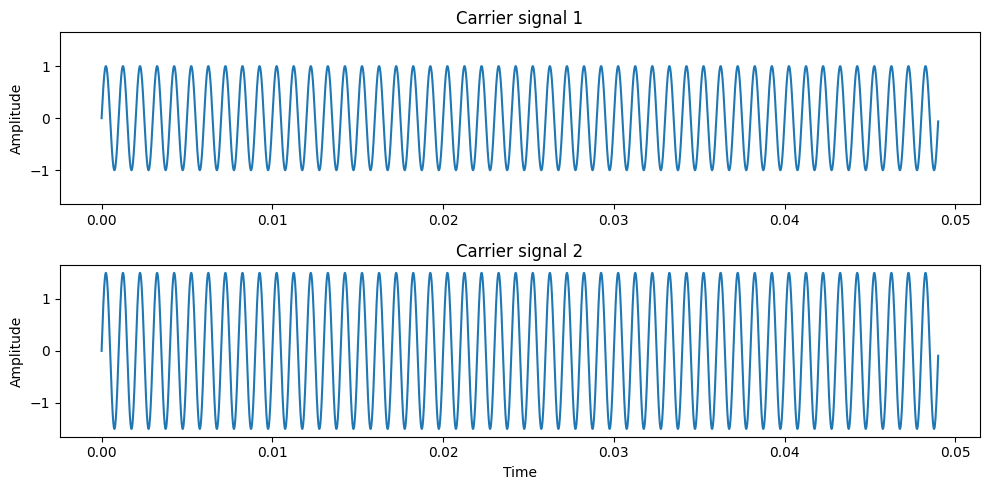

In [46]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10, 5))
ax1.set_title('Carrier signal 1')
ax1.set_ylabel('Amplitude')
ax1.plot(x, c_1)
ax2.set_title('Carrier signal 2')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Time')
ax2.plot(x, c_2)
fig.tight_layout()
fig.show()

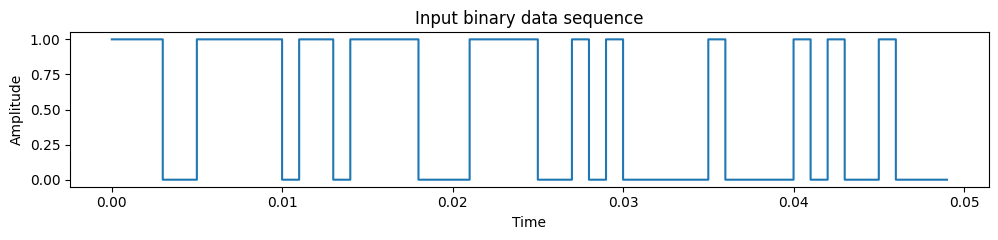

In [47]:
data = np.repeat(b, Spb)
plt.figure(figsize = (10, 2.5))
plt.title('Input binary data sequence')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.step(x, data)
plt.tight_layout()
plt.show()

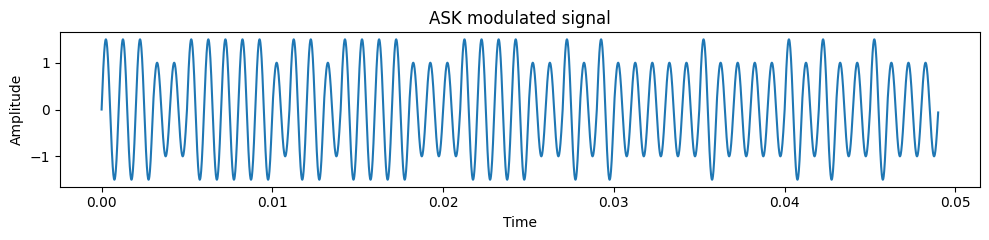

In [48]:
mod = np.where(data == 0, data+c_1, data*c_2)
plt.figure(figsize = (10, 2.5))
plt.title('ASK modulated signal')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x, mod)
plt.tight_layout()
plt.show()

### Demodulation

In [49]:
demod = np.zeros_like(b).astype('int')

In [50]:
for i in range(0, n*Spb, Spb):
    I_1 = np.trapz(mod[i:i+Spb]*c_1[i:i+Spb])
    e_1 = np.sum(c_1[i:i+Spb]**2)
    I_2 = np.trapz(mod[i:i+Spb]*c_2[i:i+Spb])
    e_2 = np.sum(c_2[i:i+Spb]**2)
    if I_1 - 1/2*e_1 > I_2 - 1/2*e_2:
        demod[np.floor(i/Spb).astype('int')] = 0
    else:
        demod[np.floor(i/Spb).astype('int')] = 1

Demodulated binary data sequence:	 [1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0]
Input binary data sequence:		 [1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\2204230220.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


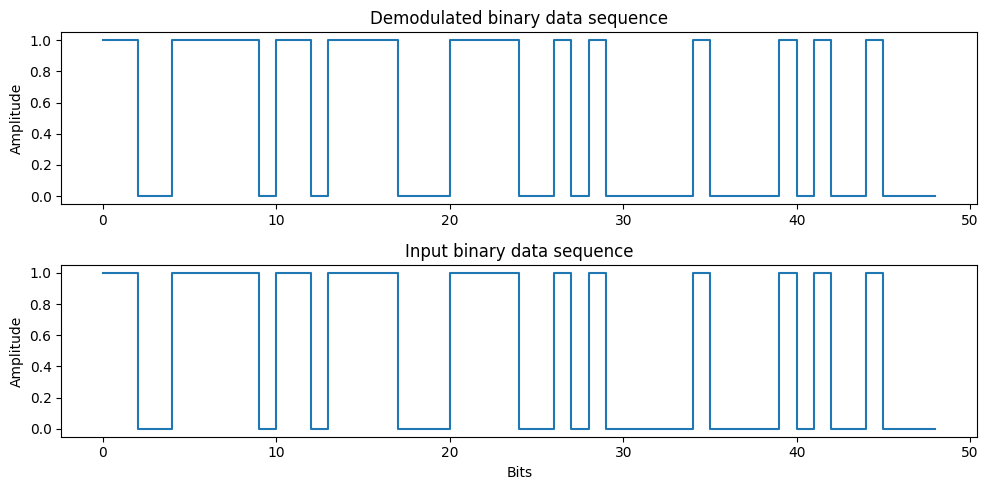

In [51]:
print('Demodulated binary data sequence:\t', demod)
print('Input binary data sequence:\t\t', b)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10, 5))
ax1.set_title('Demodulated binary data sequence')
ax1.set_ylabel('Amplitude')
ax1.step(np.arange(n), demod)
ax2.set_title('Input binary data sequence')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Bits')
ax2.step(np.arange(n), b)
fig.tight_layout()
fig.show()

### Add noise

In [52]:
mean = 0
sigma = 1
noise = np.random.normal(mean, sigma, mod.shape[0])
r_t = mod + noise

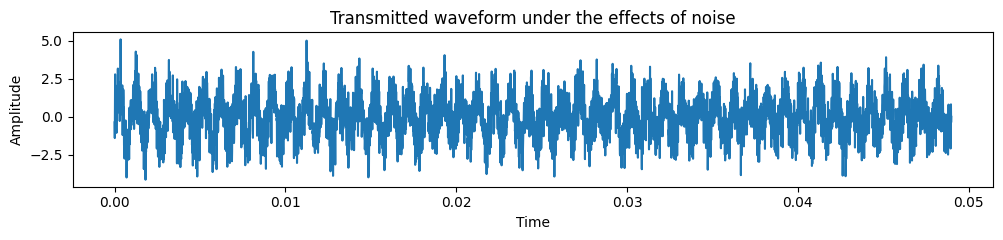

In [53]:
plt.figure(figsize = (10, 2.5))
plt.title('Transmitted waveform under the effects of noise')
plt.ylabel('Amplitude')
plt.xlabel('Time')
plt.plot(x, r_t)
plt.tight_layout()
plt.show()

In [54]:
demod_new = np.zeros_like(b)
for i in range(0, n*Spb, Spb):
    I_1 = np.trapz(r_t[i:i+Spb]*c_1[i:i+Spb])
    e_1 = np.sum(c_1[i:i+Spb]**2)
    I_2 = np.trapz(r_t[i:i+Spb]*c_2[i:i+Spb])
    e_2 = np.sum(c_2[i:i+Spb]**2)
    if I_1 - 1/2*e_1 > I_2 - 1/2*e_2:
        demod_new[np.floor(i/Spb).astype('int')] = 0
    else:
        demod_new[np.floor(i/Spb).astype('int')] = 1

Demodulated binary data sequence:	 [1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 1 1 0 0 1 1 0 0]
Input binary data sequence:		 [1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 0 1 0 0 0]


C:\Users\Admin\AppData\Local\Temp\ipykernel_9588\2306473393.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


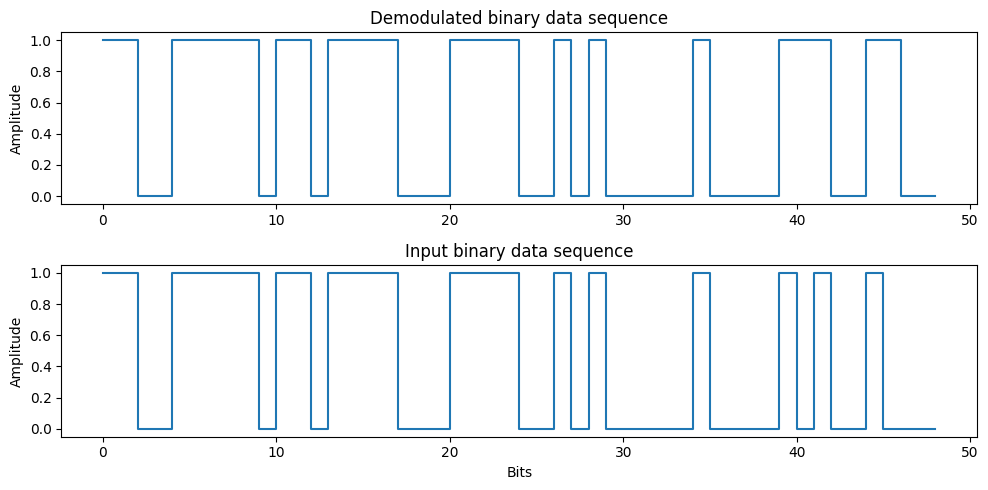

In [55]:
print('Demodulated binary data sequence:\t', demod_new)
print('Input binary data sequence:\t\t', b)
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True, figsize = (10, 5))
ax1.set_title('Demodulated binary data sequence')
ax1.set_ylabel('Amplitude')
ax1.step(np.arange(n), demod_new)
ax2.set_title('Input binary data sequence')
ax2.set_ylabel('Amplitude')
ax2.set_xlabel('Bits')
ax2.step(np.arange(n), b)
fig.tight_layout()
fig.show()

In [56]:
print(f'Error probability: {np.argwhere(demod_new != b).shape[0]/n*100}%')

Error probability: 4.081632653061225%
